### Fit the image charge potential with DSF potential


In [2]:
import numpy as num
import pandas as pan
import scipy.special as sci
import pylab as lab
from scipy.optimize import curve_fit
%matplotlib inline

In [3]:
potVal={'Au100':1,"Au111":2,"Cu100":3,"Cu111":4,"Pt100":5}

In [4]:
def Fitting(system,path,potential,alpha,r0,skip=[1,1,1]):
    
    finalpath=path+system
    params={}
    plot={}
    subSystems=["top","hollow","bridge"]
    i=0
    for ss in subSystems:
        dataPath=finalpath+ss+".dat"
        data=pan.read_csv(dataPath,delimiter="\t",skiprows=skip[i],names=["d","E","T","U"])
        dFrame=pan.DataFrame(data)
        dFrame.U=0.04336412*(dFrame.U-(potential))
        i=i+1
        
        def Pot(r,a0,a1):
            v=sci.erfc(a0*alpha*(r+a1))/(a0*(r+a1))
    
            return -14.399*v   
        
        #dFrame.to_csv(finalpath+ss+"new.dat",delimiter="\t",header=True)
        param,covar=curve_fit(Pot,dFrame.d,dFrame.U)
        x=num.linspace(min(dFrame.d),max(dFrame.d),1000)
        y=Pot(x,param[0],param[1])
        lab.plot(dFrame.d,dFrame.U,'o')
        lab.plot(x,y,'-r')
        lab.xlabel("d")
        lab.ylabel("U(eV)")
        lab.title(system+ss)
        lab.text(max(dFrame.d)-5,min(dFrame.U),param)
        lab.show()
        params[ss]=param
        #plot[ss]=fig
        
        
    return params

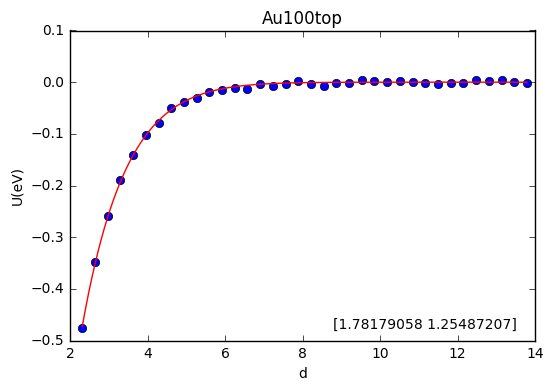

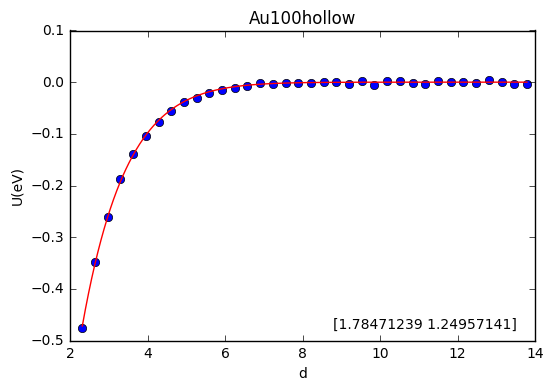

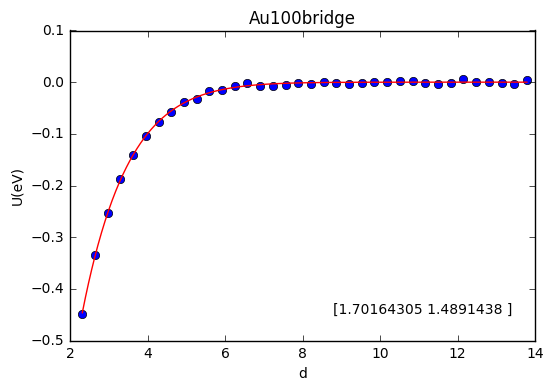

In [9]:
Au100=Fitting("Au100","../FDEAMCrystalCalculations/ImageCharge/",-153105.37,0.14,12,[5,5,5])

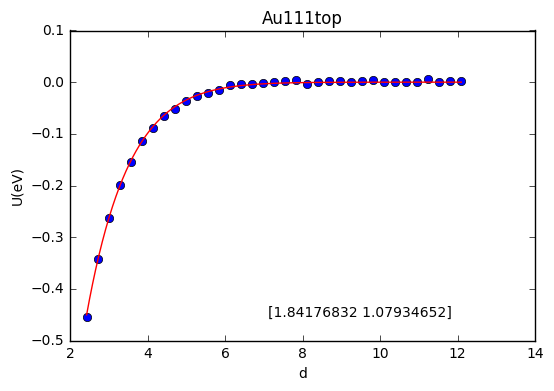

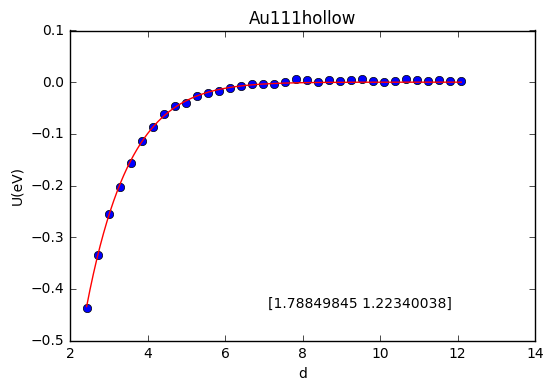

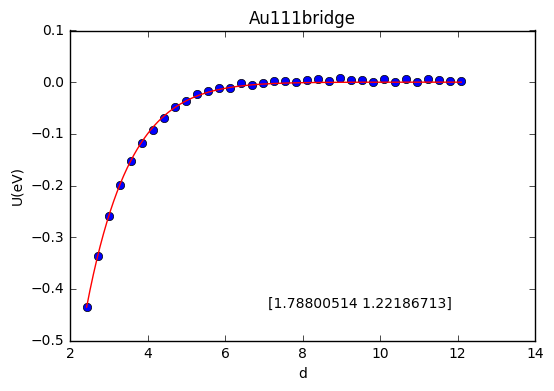

In [37]:
Au111=Fitting("Au111","../FDEAMCrystalCalculations/ImageCharge/",-128265.4,0.14,12,[1,1,1])

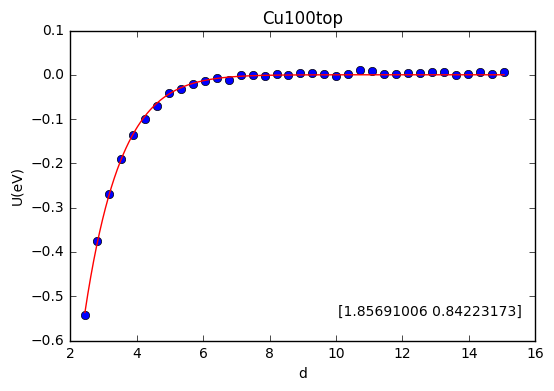

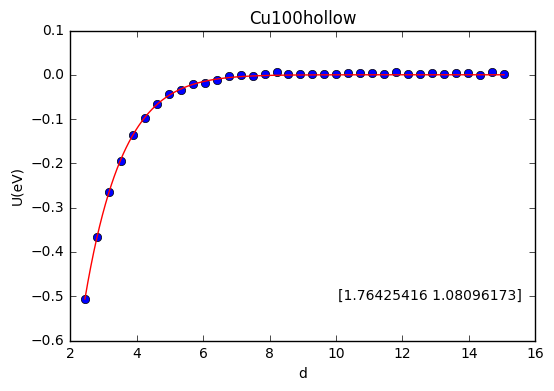

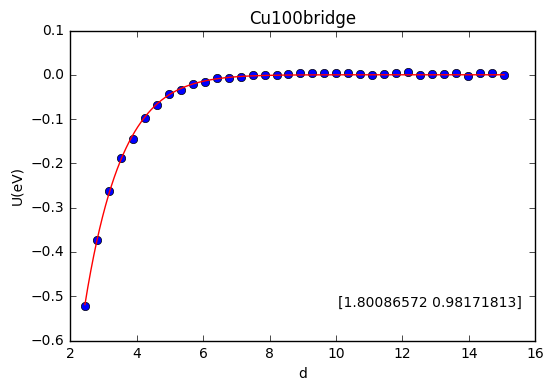

In [38]:
Cu100=Fitting("Cu100","../FDEAMCrystalCalculations/ImageCharge/",-136850.14,0.14,12,[5,5,5])

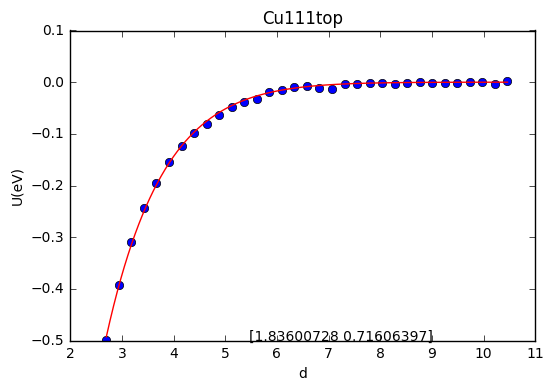

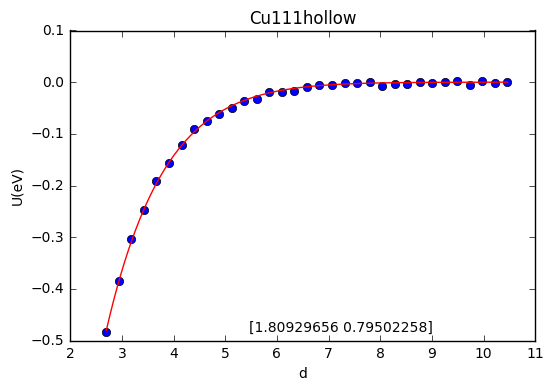

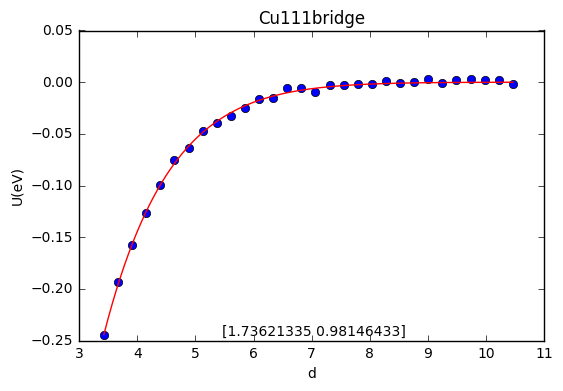

In [39]:
Cu111=Fitting("Cu111","../FDEAMCrystalCalculations/ImageCharge/",-144036.85,0.14,12,[1,1,4])

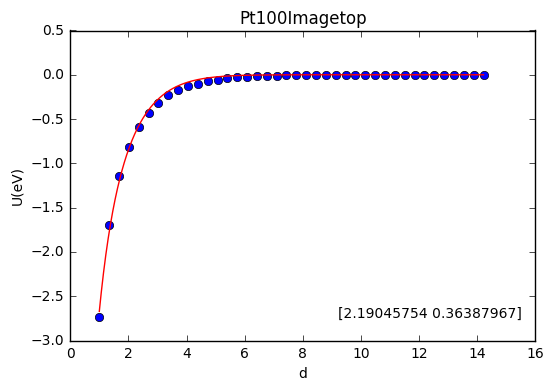

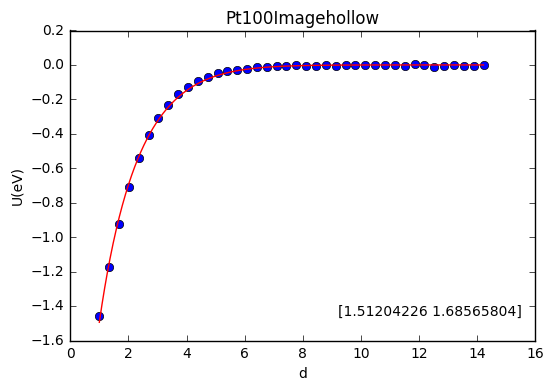

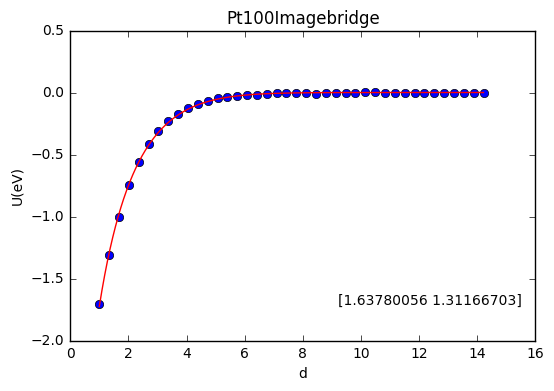

In [51]:
Pt100=Fitting("Pt100Image","../FDEAMCrystalCalculations/ImageCharge/",-222831.34,0.14,12,[1,1,1])

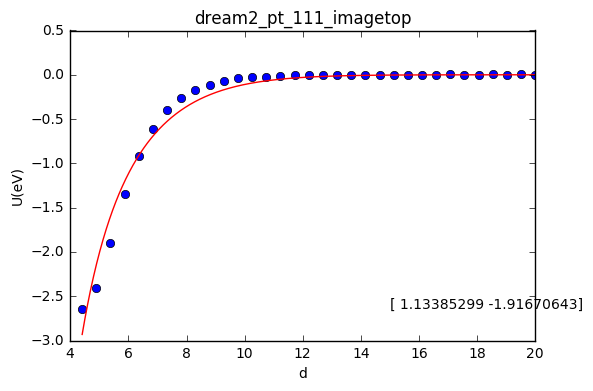

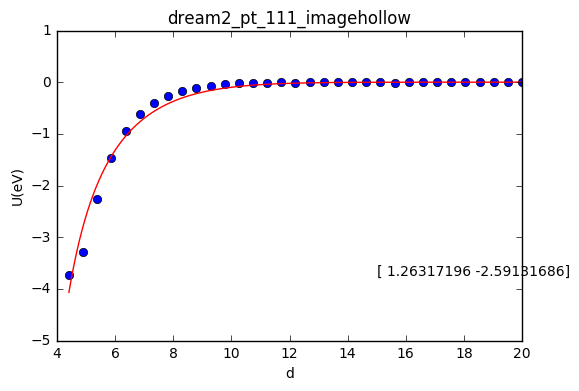

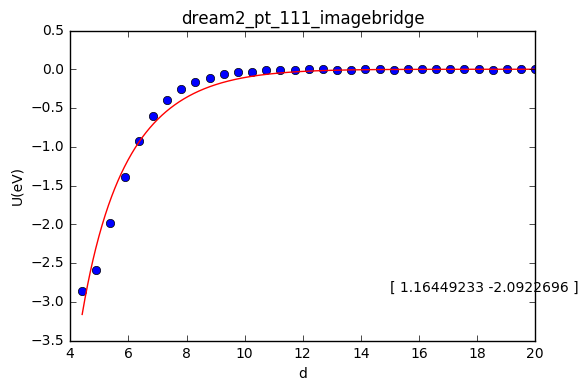

In [12]:
Pt111=Fitting("dream2_pt_111_image","../test/",-375426.840000,0.14,12,[8,8,8])

In [47]:
print("\nCu111")
print("*******************")
print(pan.DataFrame(Cu111,index=['a0','a1','a2']))
print("\nCu100")
print("*******************")
print(pan.DataFrame(Cu100,index=['a0','a1','a2']))
print("\nAu111")
print("*******************")
print(pan.DataFrame(Au111,index=['a0','a1','a2']))
print("\nAu100")
print("*******************")
print(pan.DataFrame(Au100,index=['a0','a1','a2']))
print("\nPt100")
print("*******************")
print(pan.DataFrame(Pt100,index=['a0','a1','a2']))
print("\nPt111")
print("*******************")
print(pan.DataFrame(Pt111,index=['a0','a1','a2']))


Cu111
*******************


ValueError: Shape of passed values is (3, 2), indices imply (3, 3)

In [ ]:


df1=pan.DataFrame(pan.read_csv("../FDEAMCrystalCalculations/ImageCharge/Au100bridge.dat",delimiter='\t',skiprows=1,names=["d","E","T","U"]))
df2=pan.DataFrame(pan.read_csv("../FDEAMCrystalCalculations/ImageCharge/Au100hollow.dat",delimiter='\t',skiprows=1,names=["d","E","T","U"]))
df3=pan.DataFrame(pan.read_csv("../FDEAMCrystalCalculations/ImageCharge/Au100top.dat",delimiter='\t',skiprows=1,names=["d","E","T","U"]))
lab.plot(df1.d[5:],df1.U[5:])
lab.plot(df2.d[5:],df2.U[5:])
lab.plot(df3.d[5:],df3.U[5:])

In [45]:
data=pan.read_csv("../FDEAMCrystalCalculations/ImageCharge/PtImageNegativebridge.dat",delimiter="\t",skiprows=1,names=["d","E","T","U"])
d=pan.DataFrame(data)
d

,d,E,T,U
0,4.000000,-375041.90,2.671057,-375044.58
1,4.153846,-375032.87,2.960830,-375035.83
2,4.307692,-375025.61,2.799688,-375028.41
3,4.461538,-375019.28,2.734815,-375022.02
4,4.615385,-375013.91,2.749335,-375016.66
5,4.769231,-375009.52,2.935345,-375012.46
6,4.923077,-375006.42,2.760238,-375009.18
7,5.076923,-375003.75,2.784695,-375006.54
8,5.230769,-375001.40,2.753536,-375004.16
9,5.384615,-374999.37,2.794249,-375002.17


In [ ]:
lab.plot(d.d,d.U)

In [ ]:
df=dFrame.sort_values('d')
#df.to_csv("../FDEAMCrystalCalculations/ImageCharge/largeAlpha.dat",sep='\t',header=False,index=False)
df.head()

In [30]:
param,covar=curve_fit(Pot,df.d,df.U)
param

array([ 1.87674753])

In [31]:
x=num.linspace(1,10,1000)
y=Pot(x,param[0],param[1])
lab.plot(df.d,df.U,'o')
lab.plot(x,y,'-r')
lab.show()


IndexError: index 1 is out of bounds for axis 0 with size 1

In [102]:
def Error(x,y,a,f):
    return 0.5*sum((y-f(x,a))**2)

def DerError(d,U,a,h,f,Error):
    f1=Error(d,U,a+h,f)
    f2=Error(d,U,a-h,f)
    return((f1-f2)/(2*h))

0.24770470995


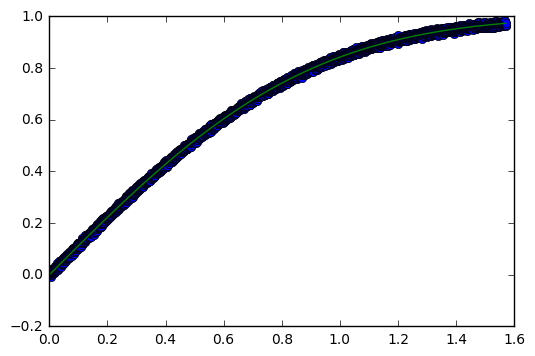

In [103]:
x=num.linspace(0,num.pi/2,10000)
er=0.005*num.random.randn(10000)
y1=sci.erf(x)+er

y=sci.erf(x)
lab.plot(x,y1,'o',x,y,'-')
print(sum(er**2))
def Quad(x,a):
    return(x**a)

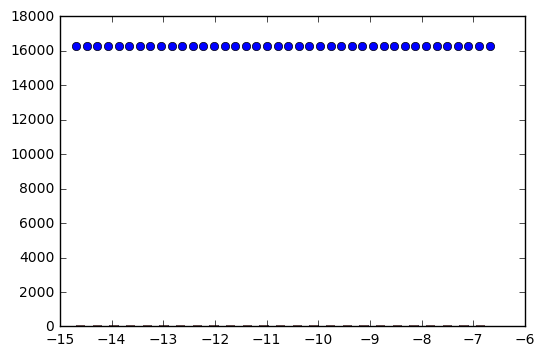

In [104]:
a=[]
error=[]
a0=1
x=df.d
y=df.U
lab.plot(x,y,'o')
for count in range(1,1000):
    
    gamma=0.001
    h=0.001
    
    a.append(a0)
    error.append(Error(x,y,a0,DSF))
    a0=a0-gamma*DerError(x,y,a0,h,DSF,Error)
    
    lab.plot(x,DSF(x,a0),'--')
    lab.show
    

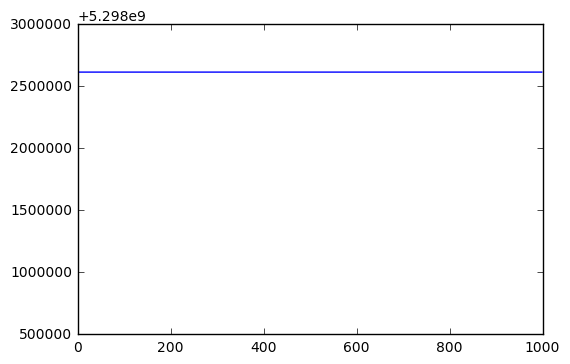

In [105]:
lab.plot(error)

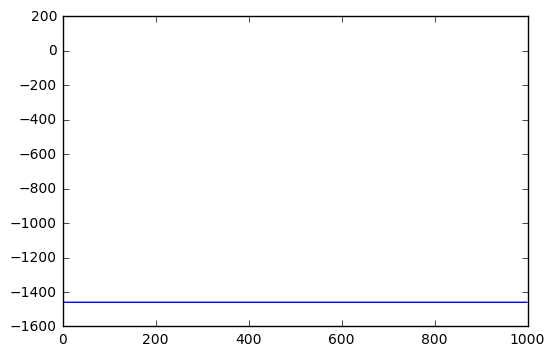

In [106]:
lab.plot(a)

In [108]:
d=pan.read_csv("../PtWaterAdsorption/outNewGridParam.dat",delimiter="\t",skiprows=1,names=["em","er","sm","sr","error"])
d.sort_values("error",inplace=True)
d.head()

,em,er,sm,sr,error
1957,0.26,0.14,2.63,1.2,1501846.22
968,0.25,0.14,2.73,1.3,1501846.22
1977,0.26,0.14,2.83,1.2,1501846.22
1978,0.26,0.14,2.83,1.3,1501846.22
1979,0.26,0.14,2.83,1.4,1501846.22


In [418]:
#na=d.columns
#for var in na:
    #print(var)
 #   lab.plot(d[var])
 #   lab.show()

In [109]:
dRes=pan.read_csv("../PtWaterAdsorption/outNewGridResult.dat",delimiter="\t",skiprows=1,names=["d","theta","ene","error"])
dRes.sort_values('error',inplace=True)
dRes.head()

,d,theta,ene,error
1957,2.724338,70.526609,-1501849.44,1501846.22
968,2.724346,70.526433,-1501849.44,1501846.22
1977,2.724337,70.526609,-1501849.44,1501846.22
1978,2.724345,70.526433,-1501849.44,1501846.22
1979,2.724352,70.526251,-1501849.44,1501846.22


In [28]:
d=pan.read_csv("../PtWaterAdsorption/outGDParam.dat",delimiter="\t",skiprows=1,names=["em","er","sm","sr","error"])
d.sort_values("error")
d.head()

,em,er,sm,sr,error
0,0.491493,0.936132,2.735837,1.313862,49.758515
1,0.490705,1.119448,2.919134,1.491763,50.019551
2,0.492571,0.926381,2.726126,1.141940,49.830816
3,0.490857,1.133825,2.933519,1.351714,49.955881
4,0.492554,0.851600,2.651352,1.013680,50.081069


em


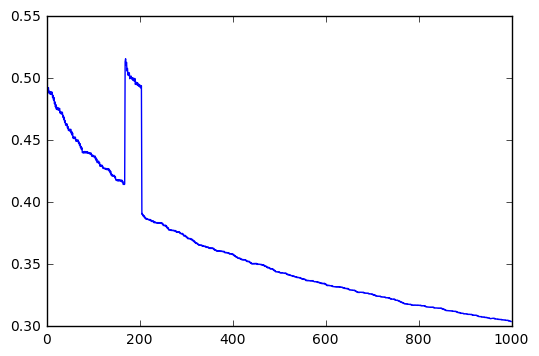

er


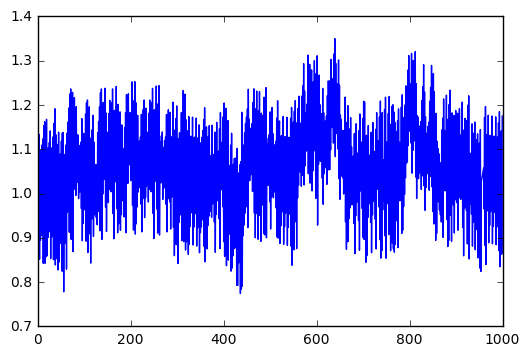

sm


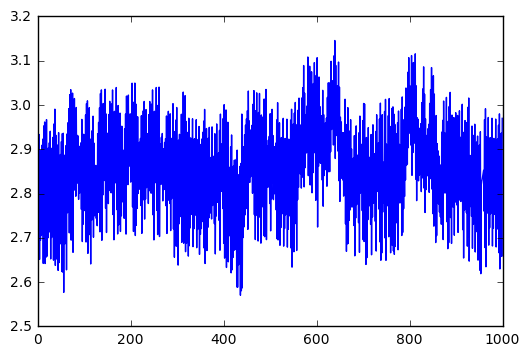

sr


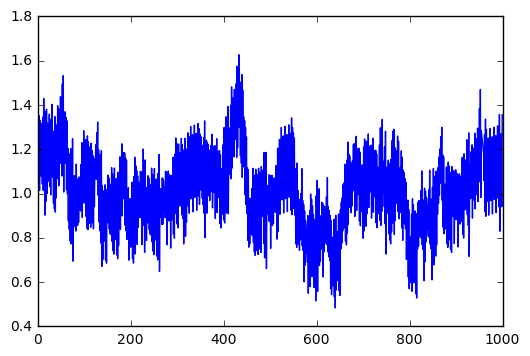

error


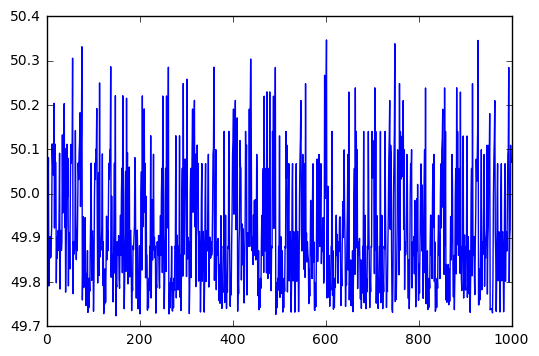

In [30]:
na=d.columns
for var in na:
    print(var)
    lab.plot(d[var])
    lab.show()

In [31]:
dRes=pan.read_csv("../PtWaterAdsorption/outGDResult.dat",delimiter="\t",skiprows=1,names=["d","theta","ene","error"])
dRes.sort_values("error").head()

,d,theta,ene,error
149,4.014554,70.316086,-56.38,49.723922
493,3.989796,70.366615,-56.39,49.727274
263,3.993504,70.358990,-56.39,49.728261
201,4.061719,70.205113,-56.37,49.728414
123,4.030808,70.278719,-56.38,49.728757


d


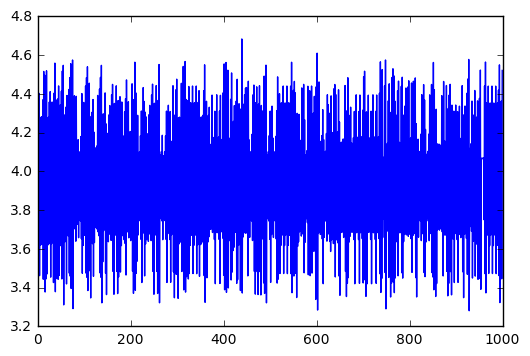

theta


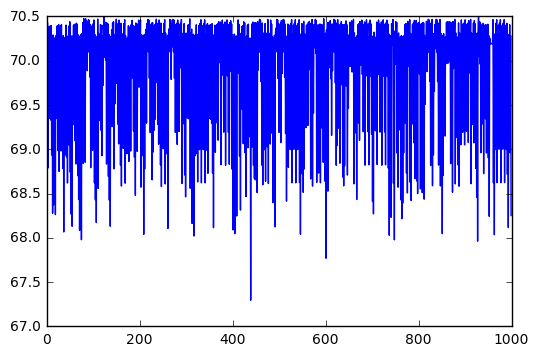

ene


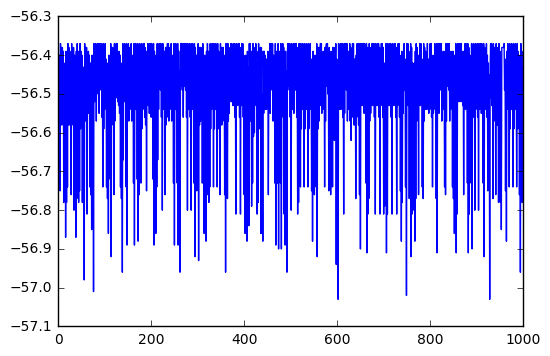

error


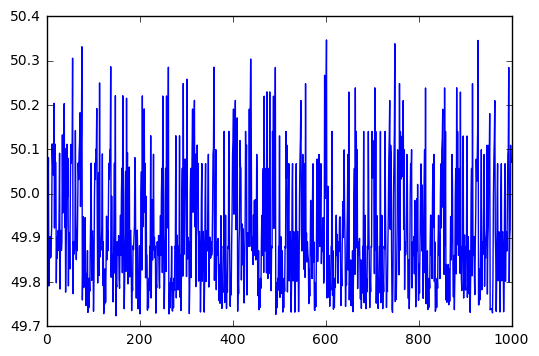

In [33]:
na=dRes.columns
for var in na:
    print(var)
    lab.plot(dRes[var])
    lab.show()

[-19.46655116 -75.5240559 ]


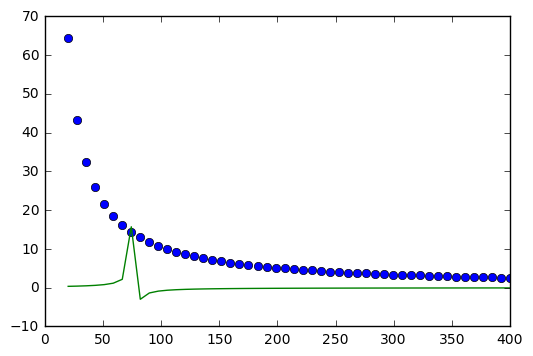

In [788]:
def func(x,a,b):
    #return sci.erfc(0.0001*a*(x+b))/(a*(x+b))
    return a/(x+b)
d=num.random.random(1000000).reshape(1000,1000)*10
f=[]
dd=num.linspace(20,400)
for distance in dd:
    dist=num.sqrt(d[:,1]**2+(d[:,0]-distance)**2)
    #f.append(num.sum(sci.erfc(0.0001*dist)/dist))
    f.append(num.sum(1/dist))
par,cov=curve_fit(func,dd,f)
lab.plot(dd,f,'o',dd,func(dd,par[0],par[1]))
print(par)

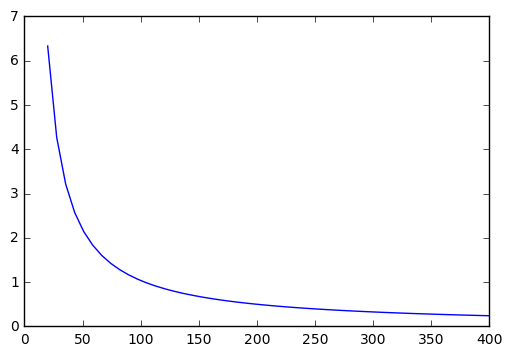

In [780]:
lab.plot(dd,f)

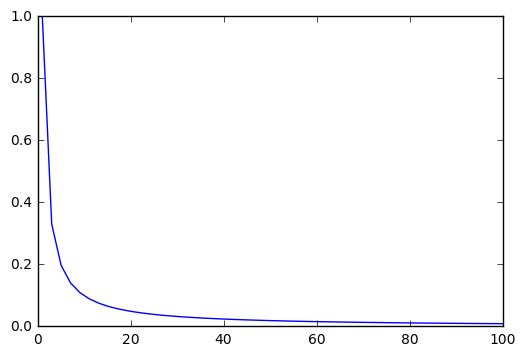

In [762]:
x=num.linspace(1,100)
lab.plot(x,sci.erfc(0.001*x)/x)
lab.show()

In [758]:
sci.erfc(0.001*x)/x

array([ 0.99887162])